In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
lena = Image.open('lena_color.tiff')

In [4]:
lenarr = np.array(lena)

kernel = np.array([[2, 4, 5, 4, 2],[4, 9, 12, 9, 4],[5, 12, 15, 12, 5], [4, 9, 12, 9, 4], [2, 4, 5, 4, 2]])
print(lenarr.shape)
print(kernel)

(512, 512, 3)
[[ 2  4  5  4  2]
 [ 4  9 12  9  4]
 [ 5 12 15 12  5]
 [ 4  9 12  9  4]
 [ 2  4  5  4  2]]


In [1]:
def gaussian_blur(im, ker):
    blurred = np.copy(im) #np.zeros((im.shape[0], im.shape[1], im.shape[2])) #zeros result in a black border, copy in 2 pixels unblurred
    ker_sum = np.sum(ker)
    
    x = int(ker.shape[0]/2)
    x2 = x
    
    if not ker.shape[0]/x == 2:
        x2 = x+1
    
    y = int(ker.shape[1]/2)
    y2 = y
    if not ker.shape[1]/y == 2:
        y2 = y+1
    #x to x2 and y to y2 for making kernel sized pixel raster
    for c in range(im.shape[2]):
        imc = im[:,:,c] # one colour at a time
        for i in range(2, imc.shape[0]-2):
            for j in range(2, imc.shape[1]-2):
                blurred[i, j, c] = np.floor(np.sum(np.multiply(imc[i-x:i+x2, j-y:j+y2], ker))/ker_sum) #calculted pixel value
    return blurred

In [6]:
b_lena = gaussian_blur(lenarr, kernel).astype(int)


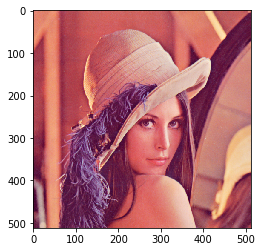

In [7]:
plt.imshow(lenarr)

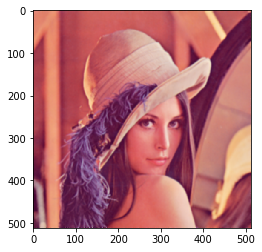

In [8]:
plt.imshow(b_lena)
plt.imsave('blurred_lena.png', b_lena)